<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/PumpingProblem/SolutionInDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']

In [68]:
Wp, ηp, ρ, g, S, Δ = sp.symbols( "W_p, η_p, ρ, g, S, Δ" ) 
Wp = ρ*g*S*Δ**2 / ηp / 2
Wp

S*g*Δ**2*ρ/(2*η_p)

In [69]:
Wt, ηt, R = sp.symbols( "W_t, η_t, R" ) 
Wt = sp.expand(ρ*g*S*(R+Δ)**2 * ηt) / 2
Wt

R**2*S*g*η_t*ρ/2 + R*S*g*Δ*η_t*ρ + S*g*Δ**2*η_t*ρ/2

In [77]:
Wt0 = ρ*g*S*R**2/2

In [78]:
G = sp.simplify(sp.cancel((Wt-Wp)/Wt0))
G

η_t + 2*Δ*η_t/R + Δ**2*η_t/R**2 - Δ**2/(R**2*η_p)

In [79]:
dGdΔ = sp.diff(G,Δ)
sset = sp.solve(dGdΔ,Δ)
sset

[-R*η_p*η_t/(η_p*η_t - 1)]

In [80]:
sol=sset[0]
sol

-R*η_p*η_t/(η_p*η_t - 1)

In [81]:
m = sp.simplify( G.subs( Δ, sol ) )
m

-η_t/(η_p*η_t - 1)

In [84]:
η = sp.symbols( "η" ) 
f = m.subs( ηt, η ).subs( ηp, η )
f

-η/(η**2 - 1)

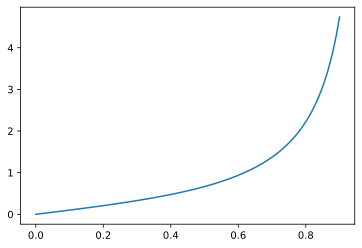

In [100]:
lam_f = sp.lambdify(η, f, modules=['numpy'])

η_vals = np.linspace(0, 0.9, 100)
f_vals = lam_f(η_vals)

mpl.plot(η_vals, f_vals)
mpl.show()

In [101]:
g = G.subs( ηt, η ).subs( ηp, η ).subs( R, 5 ).subs( Δ, 1 )

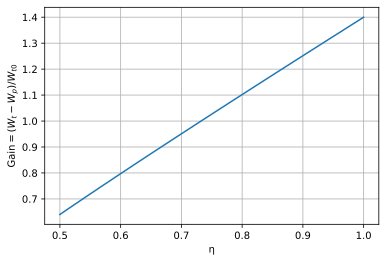

In [107]:
lam_g = sp.lambdify( η, g )

η_vals = np.linspace(0.5, 1.0, 100)
g_vals = lam_g(η_vals)

mpl.plot(η_vals, g_vals)
mpl.xlabel("η")
mpl.ylabel("$\mathrm{Gain}=(W_t-W_p)/W_{t0}$")
mpl.grid()